In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import math
import scipy

[7 8 6 8 5 4 6 6 3 5]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


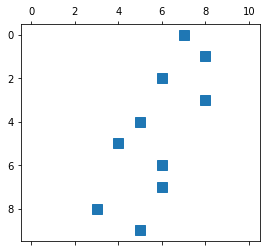

11.606495510746328


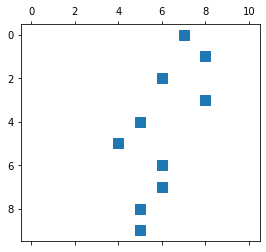

10.885376207850076


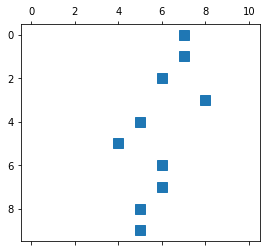

11.011473360201203


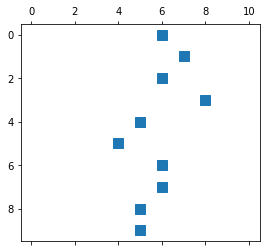

10.878099026227124


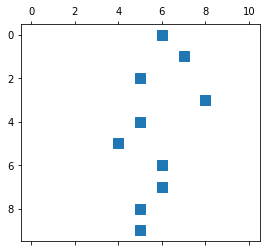

10.890580321685063


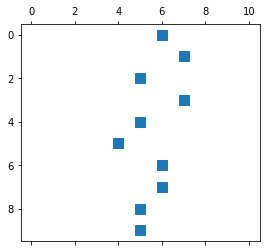

10.602023404854647


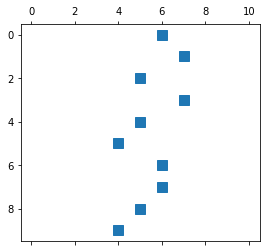

10.555897068012026


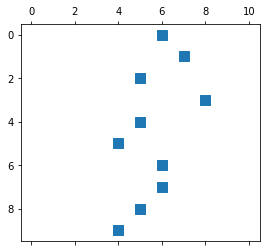

10.844453984842442


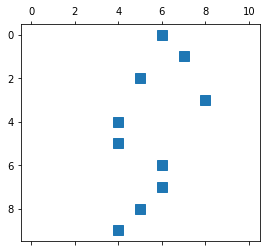

11.059713284683733


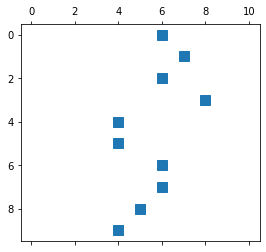

10.9480748473621


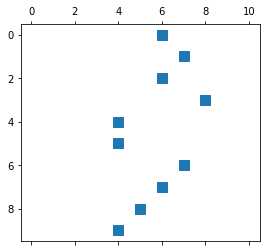

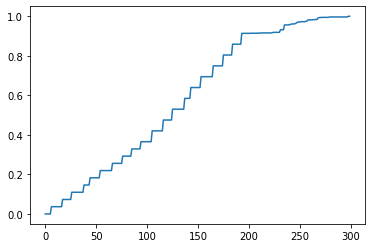

In [2]:
N = 10
#Construct the matrix of initial opinions on BT
O = np.zeros(shape = (N,11))

opinions_start = np.random.randint(0,10,N)
print(opinions_start)

for i in range(N):
    temp = opinions_start[i]
    O[i][temp] = 1

print(O)
plt.spy(scipy.sparse.csr_matrix(O))
plt.show()
#Create the adjacency matrix 
high_threshold = 0.2
low_threshold = 0.75

A = np.zeros(shape = (N,N))
interaction_strength = np.zeros(shape=(11,11))
for i in range(N):
    if np.random.random() > 0.5:
        #Highly connected individual
        for j in range(N):
            if np.random.random() > high_threshold:
                A[i][j] = np.random.random()
            else:
                A[i][j] = 0
    else:
        #Poorly connected individual
            for j in range(N):
                if np.random.random() > low_threshold:
                    A[i][j] = np.random.random()
                else:
                    A[i][j] = 0

for i in range(N):
    A[i][i] = 0;

rate_of_op_increase = 0.4
rate_of_op_decrease = 0.6

for i in range(11):
    for j in range(11):
        interaction_strength[i][j] = ((5 - i)**2/(abs(5 - j)+0.5))*0.05
        
for i in range(11):
    interaction_strength[i][i] = 0

#Would like a different function for when people both change their opinions, but seems complex so fuck it
#for i in range(11):
 #   for j in range(11):
  #      averaging_rate[i][j] = 

#Number of steps in the Gillespie algorithm
M = 10
vector_of_increase = np.zeros(shape=(10*N))
vector_of_decrease = np.zeros(shape=(10*N))
vector_of_interaction = np.zeros(shape=(2*11*N))
Rate_mat = np.zeros(shape=(N,N))
opinion_1 = np.zeros(shape=(N))
opinion_2 = opinion_1
for step in range(M):
    vector_of_interaction = np.zeros(shape=(2*11*N))
    for j in range(N):
        for i in range(10):
            vector_of_increase[j*10 + i] = O[j][i]*rate_of_op_increase
            vector_of_decrease[j*10 + i] = O[j][i+1]*rate_of_op_decrease
    
#     for i in range(11):
#         for j in range(N):
#             for k in range(11):
#                 for l in range(N):
#                     vector_of_interaction[j*11 + i + l*11 + k] = vector_of_interaction[j*11 + i + l*11 + k] + O[i][j]*O[k][l]*A[j][l]*interaction_strength[i][k]
    
    for j in range(N):
        for l in range(N):
            i = 0
            k = 0
            while O[j][i] == 0:
                i = i + 1
            while O[l][k] == 0:
                k = k + 1
            Rate_mat[j][l] = O[j][i]*O[l][k]*A[j][l]*interaction_strength[i][k]
            opinion_1[j] = i
            opinion_2[l] = k
            
    vector_of_interaction = np.reshape(Rate_mat, (1,-1))
#     vector_of_increase = np.reshape(vector_of_increase, (1,-1))
#     vector_of_decrease = np.reshape(vector_of_decrease, (1,-1))
 
    Total_rates_vector = np.block([vector_of_increase, vector_of_decrease, vector_of_interaction])
    
    normalising_factor = sum(sum(Total_rates_vector))
    print(normalising_factor)
    Cumulative_sum_vector = np.cumsum(Total_rates_vector)/normalising_factor
    
    stored_rand = np.random.random()
    index = 0
    while stored_rand >  Cumulative_sum_vector[index]:
        index = index + 1
    
    if index < 10*N:
        individual = math.floor(index/10)
        opinion = index - individual*10
        O[individual][opinion + 1] = 1
        O[individual][opinion] = 0
#         print(1)
    elif index < 20*N:
        temp_ind = index - 10*N
        individual = math.floor(temp_ind/10)
        opinion = temp_ind - individual*10 + 1
#         print(individual)
#         print(opinion)
        O[individual][opinion - 1] = 1
        O[individual][opinion] = 0
#         print(2)
    else:
        temp_ind = index - 20*N
        ind1 = math.floor(temp_ind/N)
        ind2 = temp_ind - ind1*N
        op1 = int(opinion_1[ind1])
        op2 = int(opinion_2[ind2])
#         print(3)
        O[ind1][op1] = 0
        O[ind1][op2] = 1
    plt.spy(scipy.sparse.csr_matrix(O))
    plt.show()
        
#         print(temp_ind)
#         print((temp_ind - 20)/22)
#         a = (temp_ind - 20)/22
#         con = 1
#         temp = round(a/2*con,0)
#         upper = round(a) + temp
#         lower = round(a) - temp
# #         while upper > N or lower < 0:
# #             con = con + 1
# #             temp = round(a/2*con,0)
# #             upper = round(a)
# #             + temp
# #             lower = round(a) - temp
#         print(upper)
#         print(lower)
#         print(-1)
        

plt.plot(Cumulative_sum_vector)

In [6]:
plt.savefig('tri.png')

<Figure size 432x288 with 0 Axes>